<a href="https://colab.research.google.com/github/AI-public/Back-to-Basics-Autoencoder/blob/main/DEEPEST_AUTOENCODER_ACTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_224 (Dense)            (None, 1000)              785000    
_________________________________________________________________
dense_225 (Dense)            (None, 784)               784784    
_________________________________________________________________
dense_226 (Dense)            (None, 392)               307720    
_________________________________________________________________
dense_227 (Dense)            (None, 256)               100608    
_________________________________________________________________
dense_228 (Dense)            (None, 128)               32896     
_________________________________________________________________
out_enco (Dense)             (None, 64)                8256      
Total params: 2,019,264
Trainable params: 2,019,264
Non-trainable params: 0
_________________________________________________

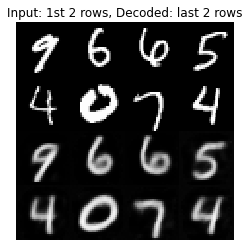

In [23]:
 # A 56 layers stacked autoencoder :D

 # - no signs ov overfitting whatsoever
 # - outstanding reconstruction with only 2 neurons in the bottleneck
 # - DEEPEST mnist autoencoder in the internet (?)


from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K

from keras.models import Model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.layers import Dropout

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras import regularizers
import numpy as np
import h5py



# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)



# FULL MODEL

# encoder 1 // 6 Layers 
encoder = Sequential(name ="Encoder")
encoder.add(Dense(1000,  activation=LeakyReLU(alpha=0.1), input_shape=(784,)))
encoder.add(Dense(784,activation=LeakyReLU(alpha=0.1)))
encoder.add(Dense(392,activation=LeakyReLU(alpha=0.1)))
encoder.add(Dense(256,activation=LeakyReLU(alpha=0.1)))
encoder.add(Dense(128,activation=LeakyReLU(alpha=0.1)))
encoder.add(Dense(64,name= "out_enco",activation=LeakyReLU(alpha=0.1)))
encoder.summary()
# end encoder 1

# encoder 2 // 2 Layers , total layers 8
encoder2 = Sequential(name ="Encoder2")
decoder2 = Sequential(name ="Decoder2")
encoder2.add(Dense(32,  activation=LeakyReLU(alpha=0.1), input_shape=(64,)))
encoder2.add(Dense(24,activation=LeakyReLU(alpha=0.1),name= "out_enco2"))
# end encoder 2

#encoder 3 // 2 Layers , total layers 10
encoder3 = Sequential(name ="Encoder3")
decoder3 = Sequential(name ="Decoder3")
encoder3.add(Dense(20,  activation=LeakyReLU(alpha=0.1), input_shape=(24,)))
encoder3.add(Dense(16,activation=LeakyReLU(alpha=0.1),name= "out_enco3"))
# end encoder 3

#encoder 4 // 2 Layers , total layers 12
encoder4 = Sequential(name ="Encoder4")
decoder4 = Sequential(name ="Decoder4")
encoder4.add(Dense(14,  activation=LeakyReLU(alpha=0.1), input_shape=(16,)))
encoder4.add(Dense(12,activation=LeakyReLU(alpha=0.1),name= "out_enco4"))
#end encoder 4

#encoder 5 // 2 Layers , total layers 14
encoder5 = Sequential(name ="Encoder5")
decoder5 = Sequential(name ="Decoder5")
encoder5.add(Dense(11,  activation=LeakyReLU(alpha=0.1), input_shape=(12,)))
encoder5.add(Dense(10,activation=LeakyReLU(alpha=0.1),name= "out_enco5"))
#end encoder 5

#encoder 6 // 2 Layers , total layers 16
encoder6 = Sequential(name ="Encoder6")
decoder6 = Sequential(name ="Decoder6")
encoder6.add(Dense(9,  activation=LeakyReLU(alpha=0.1), input_shape=(10,)))
encoder6.add(Dense(8,activation=LeakyReLU(alpha=0.1),name= "out_enco6"))
# end encoder 6

#encoder 7 // 2 Layers , total layers 18
encoder7 = Sequential(name ="Encoder7")
decoder7 = Sequential(name ="Decoder7")
encoder7.add(Dense(7,  activation=LeakyReLU(alpha=0.1), input_shape=(8,)))
encoder7.add(Dense(6,activation=LeakyReLU(alpha=0.1),name= "out_enco7"))
#end encoder 7

#encoder 8 // 2 Layers , total layers 20
encoder8 = Sequential(name ="Encoder8")
decoder8 = Sequential(name ="Decoder8")
encoder8.add(Dense(6,  activation=LeakyReLU(alpha=0.1), input_shape=(6,)))
encoder8.add(Dense(5,activation=LeakyReLU(alpha=0.1),name= "out_enco8"))
#end encoder 8

#encoder 9 // 2 Layers , total layers 22
encoder9 = Sequential(name ="Encoder9")
decoder9 = Sequential(name ="Decoder9")
encoder9.add(Dense(5,  activation=LeakyReLU(alpha=0.1), input_shape=(5,)))
encoder9.add(Dense(4,activation=LeakyReLU(alpha=0.1),name= "out_enco9"))
#end encoder 9

#encoder 10 // 2 Layers , total layers 24
encoder10 = Sequential(name ="Encoder10")
decoder10 = Sequential(name ="Decoder10")
encoder10.add(Dense(4,  activation=LeakyReLU(alpha=0.1), input_shape=(4,)))
encoder10.add(Dense(3,activation=LeakyReLU(alpha=0.1),name= "out_enco10"))
#end encoder 10

#encoder 11 // 2 Layers , total layers 26
encoder11 = Sequential(name ="Encoder11")
decoder11 = Sequential(name ="Decoder11")
encoder11.add(Dense(3,  activation=LeakyReLU(alpha=0.1), input_shape=(3,)))
encoder11.add(Dense(2,activation=LeakyReLU(alpha=0.1),name= "out_enco11"))
#end encoder 11


############################################################################


#decoder 11 // 2 Layers , total layers 28
decoder11.add(Dense(2,  activation=LeakyReLU(alpha=0.1), input_shape=(2,)))
decoder11.add(Dense(3,name= "out_deco11",activation=LeakyReLU(alpha=0.1)))
#end decoder 11

#decoder 10 // 2 Layers , total layers 30
decoder10.add(Dense(3,  activation=LeakyReLU(alpha=0.1), input_shape=(3,)))
decoder10.add(Dense(4,name= "out_deco10",activation=LeakyReLU(alpha=0.1)))
#end decoder 10

#decoder 9 // 2 Layers , total layers 30
decoder9.add(Dense(4,  activation=LeakyReLU(alpha=0.1), input_shape=(4,)))
decoder9.add(Dense(5,name= "out_deco9",activation=LeakyReLU(alpha=0.1)))
#end decoder 9

#decoder 8 // 2 Layers , total layers 32
decoder8.add(Dense(5,  activation=LeakyReLU(alpha=0.1), input_shape=(5,)))
decoder8.add(Dense(6,name= "out_deco8",activation=LeakyReLU(alpha=0.1)))
#end decoder 8

#decoder 7 // 3 Layers , total layers 35
decoder7.add(Dense(6,  activation=LeakyReLU(alpha=0.1), input_shape=(6,)))
decoder7.add(Dense(7,activation=LeakyReLU(alpha=0.1)))
decoder7.add(Dense(8,name= "out_deco7",activation=LeakyReLU(alpha=0.1)))
#end decoder 7

#decoder 6 // 3 Layers , total layers 38
decoder6.add(Dense(8,  activation=LeakyReLU(alpha=0.1), input_shape=(8,)))
decoder6.add(Dense(9,activation=LeakyReLU(alpha=0.1)))
decoder6.add(Dense(10,name= "out_deco6",activation=LeakyReLU(alpha=0.1)))
#end decoder 6


#decoder 5 // 3 Layers , total layers 41
decoder5.add(Dense(10,  activation=LeakyReLU(alpha=0.1), input_shape=(10,)))
decoder5.add(Dense(11,activation=LeakyReLU(alpha=0.1)))
decoder5.add(Dense(12,name= "out_deco5",activation=LeakyReLU(alpha=0.1)))
#end decoder 5


#decoder 4 // 3 Layers , total layers 44
decoder4.add(Dense(12,  activation=LeakyReLU(alpha=0.1), input_shape=(12,)))
decoder4.add(Dense(14,activation=LeakyReLU(alpha=0.1)))
decoder4.add(Dense(16,name= "out_deco4",activation=LeakyReLU(alpha=0.1)))
#end decoder 4


#decoder 3 // 3 Layers , total layers 47
decoder3.add(Dense(16,  activation=LeakyReLU(alpha=0.1), input_shape=(16,)))
decoder3.add(Dense(20,activation=LeakyReLU(alpha=0.1)))
decoder3.add(Dense(24,name= "out_deco3",activation=LeakyReLU(alpha=0.1)))
# end decoder 3

# decoder 2 // 3 Layers , total layers 50
decoder2.add(Dense(24,  activation=LeakyReLU(alpha=0.1), input_shape=(24,)))
decoder2.add(Dense(32,activation=LeakyReLU(alpha=0.1)))
decoder2.add(Dense(64,name= "out_deco2",activation=LeakyReLU(alpha=0.1)))
# end decoder 2

# decoder 1 // 6 Layers , total layers 56
decoder = Sequential(name ="Decoder")
decoder.add(Dense((128),activation=LeakyReLU(alpha=0.1),input_shape = (64,)))
decoder.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
decoder.add(Dense(392, activation=LeakyReLU(alpha=0.1)))
decoder.add(Dense(784, activation=LeakyReLU(alpha=0.1)))
decoder.add(Dense(1000, activation=LeakyReLU(alpha=0.1)))
decoder.add(Dense(784,  activation='sigmoid'))
decoder.summary()
# end decoder 0


autoencoderDEEP =Sequential(name ="AutoencoderDEEP")
autoencoderDEEP.add(encoder)
autoencoderDEEP.add(encoder2)
autoencoderDEEP.add(encoder3)
autoencoderDEEP.add(encoder4)
autoencoderDEEP.add(encoder5)
autoencoderDEEP.add(encoder6)
autoencoderDEEP.add(encoder7)
autoencoderDEEP.add(encoder8)
autoencoderDEEP.add(encoder9)
autoencoderDEEP.add(encoder10)
autoencoderDEEP.add(encoder11)
autoencoderDEEP.add(decoder11)
autoencoderDEEP.add(decoder10)
autoencoderDEEP.add(decoder9)
autoencoderDEEP.add(decoder8)
autoencoderDEEP.add(decoder7)
autoencoderDEEP.add(decoder6)
autoencoderDEEP.add(decoder5)
autoencoderDEEP.add(decoder4)
autoencoderDEEP.add(decoder3)
autoencoderDEEP.add(decoder2)
autoencoderDEEP.add(decoder)
autoencoderDEEP.summary()
autoencoderDEEP.load_weights("z11.hdf5")


###############
# predict the autoencoder output from test data
x_decoded = autoencoderDEEP.predict(x_test[20:28])
image_size=28
# display the 1st 8 test input and decoded images
imgs = np.concatenate([x_test[20:28], x_decoded])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()




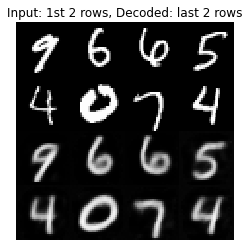

In [39]:

encoderDEEP =Sequential(name ="EncoderDEEP")
encoderDEEP.add(encoder)
encoderDEEP.add(encoder2)
encoderDEEP.add(encoder3)
encoderDEEP.add(encoder4)
encoderDEEP.add(encoder5)
encoderDEEP.add(encoder6)
encoderDEEP.add(encoder7)
encoderDEEP.add(encoder8)
encoderDEEP.add(encoder9)
encoderDEEP.add(encoder10)
encoderDEEP.add(encoder11)

decoderDEEP =Sequential(name ="DecoderDEEP")
decoderDEEP.add(decoder11)
decoderDEEP.add(decoder10)
decoderDEEP.add(decoder9)
decoderDEEP.add(decoder8)
decoderDEEP.add(decoder7)
decoderDEEP.add(decoder6)
decoderDEEP.add(decoder5)
decoderDEEP.add(decoder4)
decoderDEEP.add(decoder3)
decoderDEEP.add(decoder2)
decoderDEEP.add(decoder)

x_decoded=decoderDEEP.predict(encoderDEEP.predict(x_test[20:28]))

###############
# predict the autoencoder output from test data
#x_decoded = autoencoderDEEP.predict(x_test[20:28])
image_size=28
# display the 1st 8 test input and decoded images
imgs = np.concatenate([x_test[20:28], x_decoded])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()




(60000,)


Text(0.5, 1.0, 'Data points in lower dimensional space')

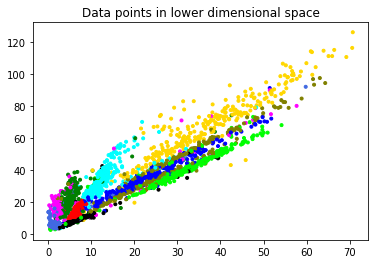

In [41]:
#Visualisation of data using 2 of the Non-Linear Principal Components 

from matplotlib import pyplot

x_encoded=encoderDEEP.predict(x_train)


print(np.shape(y_train))

colors = ['gold','red','black','lime','green','olive','cyan','royalblue','blue','magenta']

pyplot.scatter(x_encoded[0:60000:20,0],x_encoded[0:60000:20,1], marker = '.',color=np.array(colors)[(y_train[0:60000:20])])

pyplot.title('Data points in lower dimensional space')

<Figure size 1800x1800 with 0 Axes>

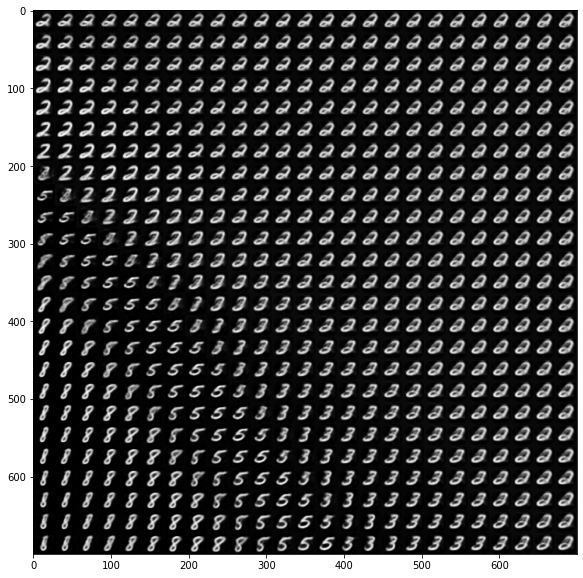

In [48]:
#Generating samples from the low-dimensional representation to the handwritten-digits space 

from numpy import random


#x_decoded=decoderDEEP.predict(x_encoded)
plt.figure(figsize=(25, 25))
x_decoded=np.zeros((625,28,28,1))
cnt=0
dim=2
for i in range(25):
  for j in range(25):
    x_decoded[cnt] = decoderDEEP.predict( np.array([10+i/2,10+j/2]).reshape(1,dim)).reshape(28,28,1)
    cnt=cnt+1

a=np.zeros((25*28,25*28),dtype=np.uint8)
for i in range(25):
  for j in range(25):

      imcurr=np.uint8(255*x_decoded[i+(25*j)].reshape(28, 28))
      a[i*28:(i*28)+28,j*28:(j*28)+28]=imcurr
      
plt.figure(figsize = ((10,10)))
plt.imshow(a)      
plt.gray()


plt.show()